## t-SNE + K-Means

In [1]:
import pandas as pd
import numpy as np

### Read datasets

In [2]:
df_help_center = pd.read_parquet("FT_SEARCH_TERMS.parquet")
df_help_center.shape

(85410, 4)

In [3]:
df_ipc = pd.read_parquet("IPC_SEARCH_QUERY_TERMS.parquet")
df_ipc.shape

(16127, 8)

In [4]:
df_google = pd.read_parquet("PERFORMANCE_REPORT_CUSTOM.parquet")
df_google.shape

(1430248, 3)

### 1- Talend Help Center : User queries + embedding

In [5]:
thc_embedd = pd.read_parquet('./queries_unique_embeddings/talend_HC_unique_queries_embedding.parquet')
thc_embedd

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
38487,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
38488,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
38489,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
38490,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


In [6]:
df_help_center['LANGUAGE'].value_counts()

en-US    77574
fr-FR     4506
ja-JP     2555
de-DE      389
zh-CN      386
Name: LANGUAGE, dtype: int64

##### Only for English queries :

In [7]:
df = df_help_center[df_help_center['LANGUAGE']=='en-US']
df2 = pd.DataFrame(df["QUERY_TERMS"].unique(), columns=['QUERY_TERMS'])
df2

,QUERY_TERMS
0,management console
1,talend cloud data catalog administration guide
2,authentication protocols
3,data catalog
4,logging in to the studio
...,...
35439,tmap type length precision
35440,create a job that illustrates the process of e...
35441,data base connecton
35442,selecting and configuring the database


In [8]:
thc_en = pd.merge(thc_embedd, df2, on='QUERY_TERMS', how='inner')
thc_en

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
35439,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
35440,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
35441,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
35442,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


### 2- Google : User queries + embedding

In [9]:
google_embedd = pd.read_parquet('./queries_unique_embeddings/google_queries_unique_embeddings.parquet')
google_embedd

,QUERY,embedding
0,talend sap,"[-0.011422375105710116, -0.0332235988715449, 0..."
1,sap talend,"[-0.006255174100263367, -0.02995636335497445, ..."
2,tflowtoiterate talend,"[-0.04371899229381361, -0.026086970706513456, ..."
3,talend tftpfilelist,"[-0.020819874876695583, -0.02204194323452131, ..."
4,talend java version,"[0.0006890799722034253, -0.036536014890475504,..."
...,...,...
11469,remove duplicates in ssis,"[-0.005339802104102244, 0.005379091811963196, ..."
11470,telecharger talend open studio for data integr...,"[-0.010846117369653428, -0.044624830944309524,..."
11471,excel afficher date du jour,"[-0.03160782917011587, -0.004686912076193646, ..."
11472,java home windows,"[-0.008222157815992939, -0.022413921789728477,..."


### 3-IPC: User queries + embedding

In [10]:
ipc_embedd = pd.read_parquet('./queries_unique_embeddings/ipc_queries_unique_embeddings.parquet')
ipc_embedd

,INPUT_VALUES_SEARCH_QUERY,embedding
1,delete account,"[-0.03002667820875631, -0.015312518101690856, ..."
2,convert bulk to ReST,"[-0.006475940047170754, 0.013213157973951499, ..."
3,fetch license file,"[-0.0019105491550711702, 0.001966318614425126,..."
4,cannot find task version from database,"[-0.02670016570154868, -0.008580103104015208, ..."
5,character encoding,"[-0.011962658253795, 0.0005135878070066096, 0...."
...,...,...
7339,how to convert talend studio into talend cloud,"[-0.010953764802413989, -0.022288785140119494,..."
7340,IP Whitelist,"[-0.006736527387763341, -0.019494728320854058,..."
7341,full,"[-0.004613058159430843, -0.011234858964527344,..."
7342,how to conect talend studio whit talend cloud,"[-0.02093189858074042, -0.02974008631428586, 0..."


## Dimensionality reduction + Clustering:

1- t-SNE

2- K-MEANS ( K=5)

#### 1 - Talend help center

In [11]:
matrix_thc = np.vstack(thc_en.embedding.values)
type(matrix_thc)

numpy.ndarray

In [12]:
matrix_thc.shape

(35444, 1536)

In [13]:
from sklearn.manifold import TSNE

tsne_reducer = TSNE(n_components=3)
thc_embedding_3d = tsne_reducer.fit_transform(matrix_thc)

In [14]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(thc_embedding_3d)
labels = kmeans.labels_
thc_en["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
for i in range(n_clusters):
    df = thc_en[thc_en["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY_TERMS"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
using context parameters when reading a table from a database
autodocumentation
administrator console
component server
an error occurs if this component runs with this option not selected.
customizing project settings
error "user is not admin approved to access this app"
edit a previous version of a job
specify the maximum number of initial connections.
exporting a structure


################## Cluster 1 ##################
tmysqlinvalidrows
error in the component's properties:invalid character constant tmap
exponrntial notation to numeric
cdc foundation
tfileoutputxml standard properties
dm_exec_requests
==null?true:
cognos components
twhitexmlfile
z_tldbi74_read_infoprov_batch


################## Cluster 2 ##################
studio java
job server install on ec2
log4j remote
authorizationcode
jvm互換性によるエラーです。studioのjvmをご確認ください。
settrustedpackages
jira access
-dlog4j2.formatmsgnolookups=true after log4j
トークン
login timeout


#############

scatter plot of the first two components:

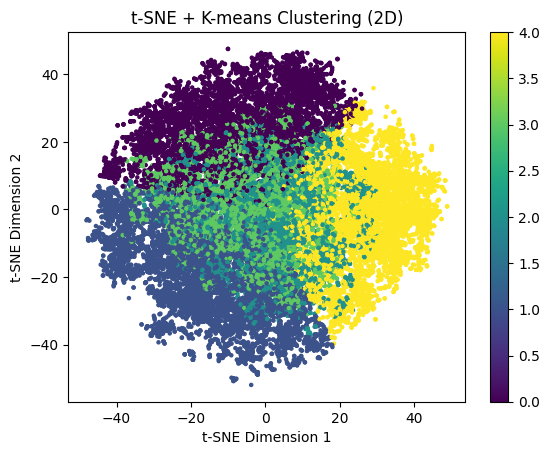

In [20]:
import matplotlib.pyplot as plt 

plt.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], c=thc_en["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + K-means Clustering (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

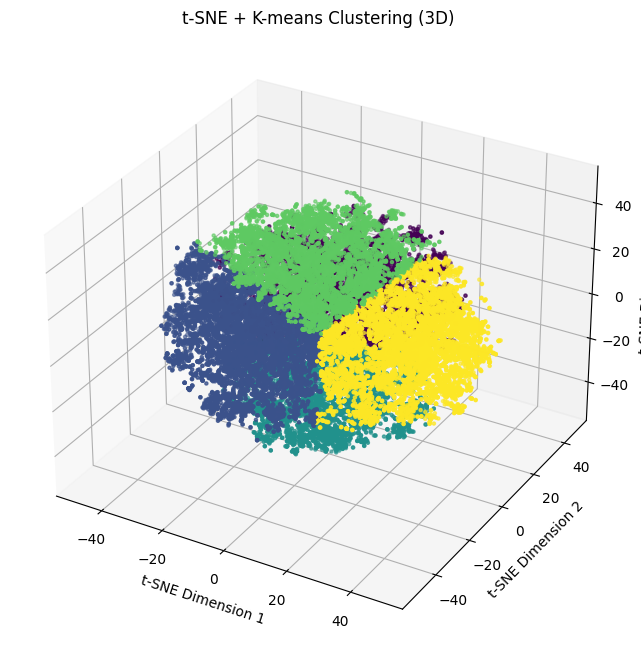

In [28]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thc_embedding_3d[:, 0], thc_embedding_3d[:, 1], thc_embedding_3d[:, 2], c=thc_en["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + K-means Clustering (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()

#### 2- Google search

In [21]:
matrix_gg = np.vstack(google_embedd.embedding.values)
type(matrix_gg)

numpy.ndarray

In [41]:
tsne_reducer = TSNE(n_components=3)
#tsne_reducer = TSNE(n_components=3, perplexity=15, random_state=42, init="random", learning_rate=200)
gg_embedding_3d = tsne_reducer.fit_transform(matrix_gg)

In [42]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(gg_embedding_3d)
labels = kmeans.labels_
google_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
for i in range(n_clusters):
    df = google_embedd[google_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
h2 database admin password
tsetproxy
how to start h2 database
image type mysql
execute test
tbufferinput talend
orphan tables
talend use context variable in query
view h2 database in browser
taccessinput


################## Cluster 1 ##################
data mapper in talend
how to download talend
talend open studio tmap
jenkins talend
talend etl open source
download talend open studio 8
all functions in talend are stored in
talend licenses
talend s3 component
how to send email notification with job execution status in talend


################## Cluster 2 ##################
json file open
yyyy-mm-dd hh
ftp properties
日付のフォーマット
sap version how to check
hdp安装
google drive token expiration
prejob
mmm dd yyyy format
credentials google


################## Cluster 3 ##################
formatdate()
talend lookup table example
tdenormalize sorted row
tunique row in talend
talend string to document
date dateformat
talend convert document to stri

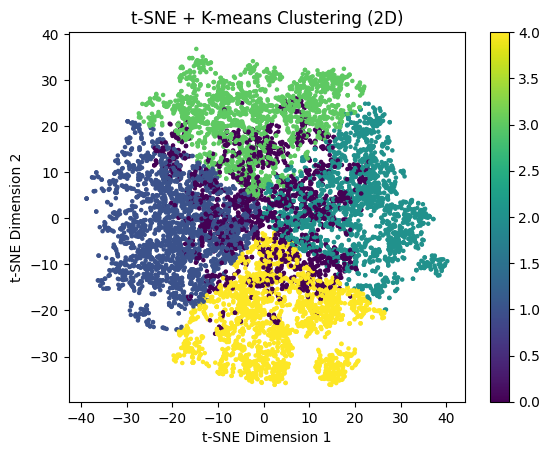

In [44]:
import matplotlib.pyplot as plt 

plt.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], c=google_embedd["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + K-means Clustering (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

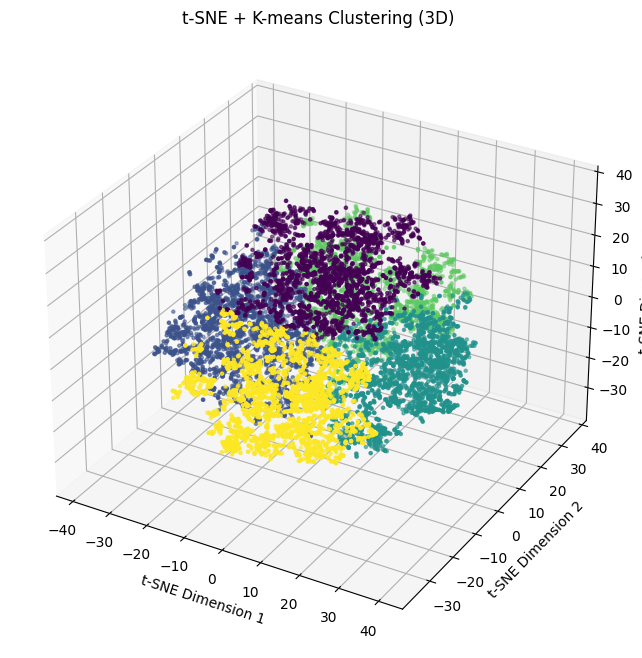

In [45]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gg_embedding_3d[:, 0], gg_embedding_3d[:, 1], gg_embedding_3d[:, 2], c=google_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + K-means Clustering (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()

#### 3- IPC

In [29]:
matrix_ipc = np.vstack(ipc_embedd.embedding.values)
type(matrix_ipc)

numpy.ndarray

In [30]:
tsne_reducer = TSNE(n_components=3)
ipc_embedding_3d = tsne_reducer.fit_transform(matrix_ipc)

In [31]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(ipc_embedding_3d)
labels = kmeans.labels_
ipc_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
for i in range(n_clusters):
    df = ipc_embedd[ipc_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["INPUT_VALUES_SEARCH_QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
I would like to cancel my subscription
how do I find the billing page?
subtract
re activate
stop subscriptio
how to do a full sync
ETL Xero
duplicate rows loaded
create an user
create user


################## Cluster 1 ##################
SSO Admin
api designer trial
Audit Log
cloud login timeout
tunpivotrow download
talend routes deployment on tmc
talend studio download option not available
enterprise studio
s3 json
tmc unresponsive


################## Cluster 2 ##################
How to change database version in metadata when it's grey
destionation for the data
preparing is slow
microsoft sql
Issue RDS integration
aws rds
update mysql2
Connect MySQL
ERROR: operator does not exist: uuid > character varying
extraction log


################## Cluster 3 ##################
group access
certificates
access_token
remote Git
I am receiving an error in GET request
Where to log in
Certification error
I can't create a new project
localhost
sign

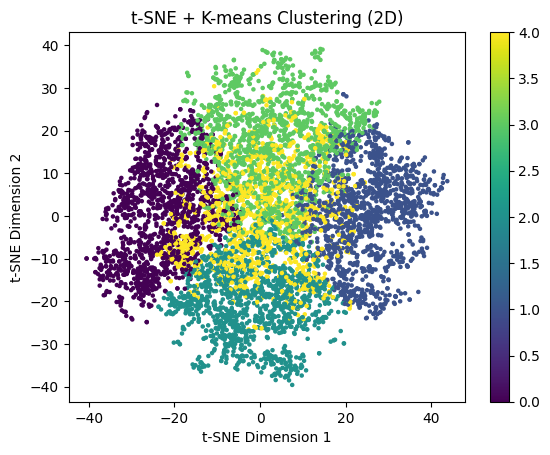

In [33]:
import matplotlib.pyplot as plt 

plt.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], c=ipc_embedd["Cluster"], cmap='viridis', s=5)
plt.title("t-SNE + K-means Clustering (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()

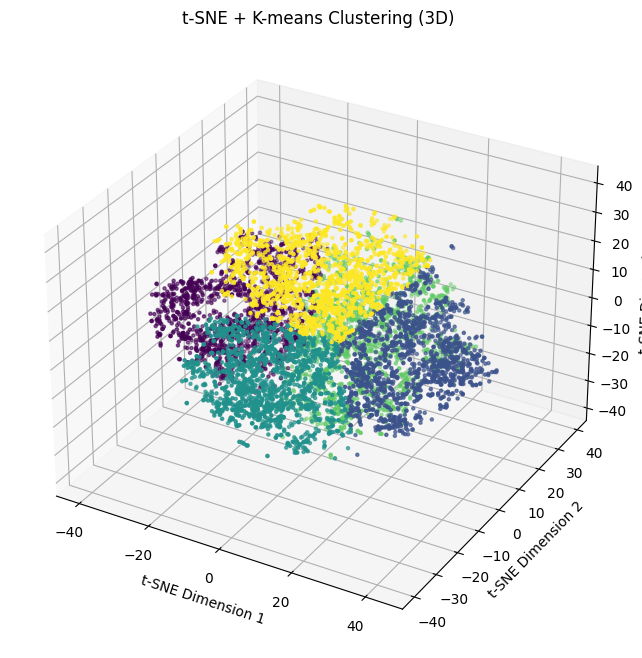

In [34]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ipc_embedding_3d[:, 0], ipc_embedding_3d[:, 1], ipc_embedding_3d[:, 2], c=ipc_embedd["Cluster"], cmap='viridis', s=5)

ax.set_title("t-SNE + K-means Clustering (3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()